In [251]:
import pandas as pd
import numpy as np
import wrangle
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from pydataset import data

In [107]:
df = data

In [216]:
Bos = data('Boston')

2) Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [217]:
Bos.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [218]:
train, validate, test = wrangle.split_continuous(Bos)

train -> (282, 14)
validate -> (122, 14)
test -> (102, 14)


In [219]:
# Split data sets into target and features
X_train = train.drop(columns=['medv'])
y_train = train['medv']
X_validate = validate.drop(columns=['medv'])
y_validate = validate['medv']
X_test = test.drop(columns=['medv'])
y_test = test['medv']

In [220]:
# Scale the train features

In [221]:
import sklearn.preprocessing

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

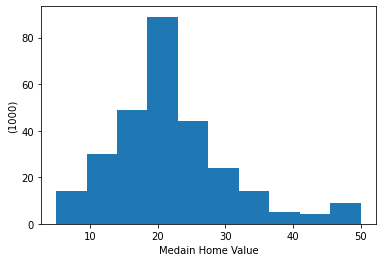

In [222]:
# Visualize target
plt.hist(y_train)
plt.xlabel("Medain Home Value")
plt.ylabel("(1000)")
plt.show()

In [223]:
# my data looks fairly normally distributed with a long right tail

In [227]:
# Set Mean/Median benchmarks
y_train.mean(), y_train.median()

(21.93368794326242, 21.0)

In [228]:
# Set y_train & y_validate as dataframes
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [241]:
y_train['MHV_mean'] = y_train['medv'].mean()
y_validate['MHV_mean'] = y_train['medv'].mean()
y_train['MHV_median'] = y_train['medv'].median()
y_validate['MHV_median'] = y_train['medv'].median()

In [244]:
# 3. RMSE of MHV_mean
rmse_train = mean_squared_error(y_train.medv, y_train.MHV_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.medv, y_validate.MHV_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  8.71 
Validate/Out-of-Sample:  10.29


In [246]:
# 3. RMSE of MHV_median
rmse_train2 = mean_squared_error(y_train.medv, y_train.MHV_median)**(1/2)
rmse_validate2 = mean_squared_error(y_validate.medv, y_validate.MHV_median)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train2, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate2, 2))

RMSE using Mean
Train/In-Sample:  8.76 
Validate/Out-of-Sample:  10.46


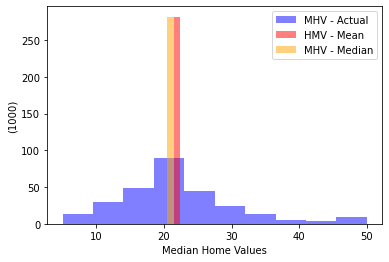

In [248]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.medv, color='blue', alpha=.5, label="MHV - Actual")
plt.hist(y_train.MHV_mean, bins=1, color='red', alpha=.5, rwidth=100, label="HMV - Mean")
plt.hist(y_train.MHV_median, bins=1, color='orange', alpha=.5, rwidth=100, label="MHV - Median")
plt.xlabel("Median Home Values")
plt.ylabel("(1000)")
plt.legend()
plt.show()

#### Linear Regression (OLS)

In [249]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.medv)

# predict train
y_train['medv_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.medv, y_train.medv_pred_lm)**(1/2)

# predict validate
y_validate['medv_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.medv, y_validate.medv_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_lm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  4.16157402457062 
Validation/Out-of-Sample:  5.44090320646237


#### LassoLars

In [254]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.medv)

# predict train
y_train['medv_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.medv, y_train.medv_pred_lars)**(1/2)

# predict validate
y_validate['medv_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.medv, y_validate.medv_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  8.70948573213272 
Validation/Out-of-Sample:  10.288711716159145


#### TweedieRegressor(GLM)

In [255]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.medv)

# predict train
y_train['medv_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.medv, y_train.medv_pred_glm)**(1/2)

# predict validate
y_validate['medv_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.medv, y_validate.medv_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train_glm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  4.0708088107090115 
Validation/Out-of-Sample:  5.067497282508355


#### Polynomial Regressor

In [262]:
# Create Polynomial Features

pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [264]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.medv)

# predict train
y_train['medv_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.medv, y_train.medv_pred_lm2)**(1/2)

# predict validate
y_validate['medv_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.medv, y_validate.medv_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  2.0882686048721686 
Validation/Out-of-Sample:  4.199787338831136


#### Evaluate

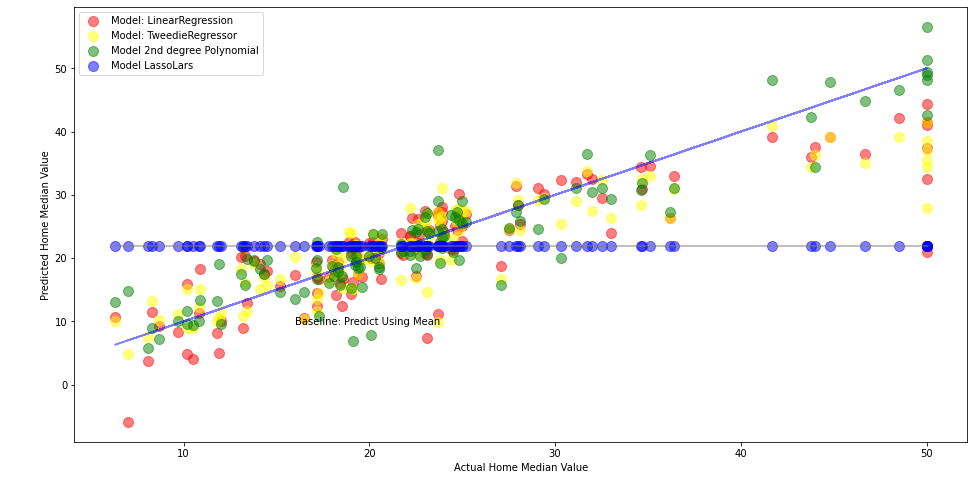

In [269]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.medv, y_validate.MHV_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.medv, y_validate.medv, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.medv, y_validate.medv_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.medv, y_validate.medv_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.medv, y_validate.medv_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.medv, y_validate.medv_pred_lars, 
            alpha=.5, color="blue", s=100, label="Model LassoLars")
plt.legend()
plt.xlabel("Actual Home Median Value")
plt.ylabel("Predicted Home Median Value")
plt.title("")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

#### Residual Plots: Plotting the Errors in Predictions

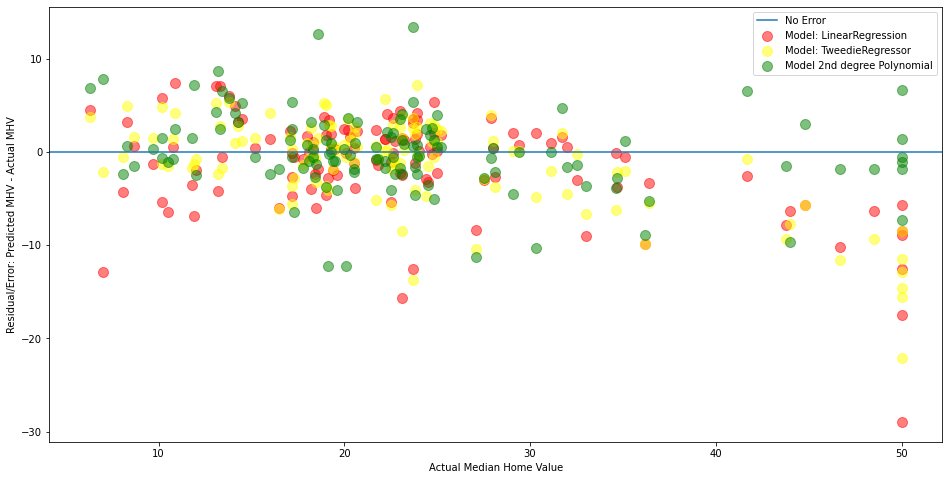

In [270]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.medv, y_validate.medv_pred_lm - y_validate.medv, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.medv, y_validate.medv_pred_glm - y_validate.medv, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.medv, y_validate.medv_pred_lm2-y_validate.medv, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Median Home Value")
plt.ylabel("Residual/Error: Predicted MHV - Actual MHV")
plt.title("")
plt.annotate("", (2.0, -10))
plt.annotate("", (15.5, 3))
plt.show()

#### Histograms

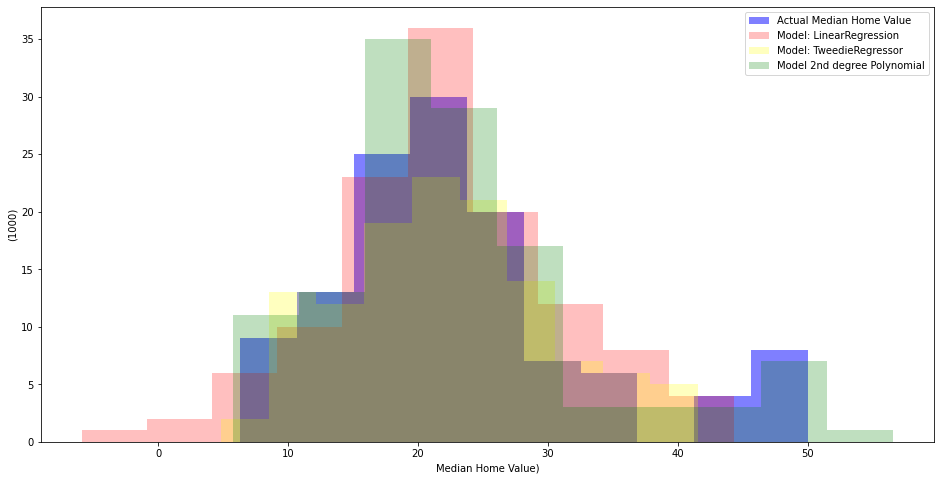

In [276]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.medv, color='blue', alpha=.5, label="Actual Median Home Value")
plt.hist(y_validate.medv_pred_lm, color='red', alpha=.25, label="Model: LinearRegression")
plt.hist(y_validate.medv_pred_glm, color='yellow', alpha=.25, label="Model: TweedieRegressor")
plt.hist(y_validate.medv_pred_lm2, color='green', alpha=.25, label="Model 2nd degree Polynomial")
plt.xlabel("Median Home Value)")
plt.ylabel("(1000)")
plt.title("")
plt.legend()
plt.show()